In [2]:
import os
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

In [26]:
displacement = np.zeros(1681*3)
for i in range (600) :
    with open(f'/home/shreyas/ME504/project/femcode(DL_executed)/femcode(DL_executed)/cont_ver2/disp1/displacement{i}', 'r') as disp:
        disp1 = disp.read()
    disp_s = disp1.split()
    disp_a = np.array(disp_s)

    disp2 = np.array([])
    for i in range (6724) :
        disp2 = np.append(disp2,float(disp_a[i])) 
    
    disp_r = np.reshape(disp2,(1681,4))
    disp_x = disp_r[:,1]
    disp_y = disp_r[:,2]
    disp_z = disp_r[:,3]
    displace = np.hstack((disp_x,disp_y,disp_z))
    displacement = np.vstack((displacement,displace))

Displacement = np.delete(displacement,0,0)

Displacement = Displacement.reshape(600,5043,1)
print(Displacement.shape)

(600, 5043, 1)


In [78]:
properties = np.zeros(401)
for i in range (600) :
    with open(f'/home/shreyas/ME504/project/femcode(DL_executed)/femcode(DL_executed)/cont_ver2/prop/prop{i}.dat', 'r') as prop:
        prop1 = prop.read()
    prop_s = prop1.split()
    prop_a = np.array(prop_s)

    prop_n= np.delete(prop_a,0)
    prop_n = np.delete(prop_n,0)
    for j in range (13) :
        prop_n = np.delete(prop_n,-1)

    prop2 = np.array([])
    for i in range (401) :
        prop2 = np.append(prop2,float(prop_a[i])) 
    
    properties = np.vstack((properties,prop2))

Properties = np.delete(properties,0,0)

Properties = Properties.reshape(600,401,1)
print(Properties.shape)



(600, 401, 1)


In [11]:
# in accordance to modified load.dat

load = np.zeros(1681)
load[1681-1] = 500000
load[1641-1] = 300000
load[861-1] = 700000
Load = load

for i in range(599) :
    Load = np.vstack((Load,load))
Load = Load.reshape(600,1681,1)
print(Load.shape)

(600, 1681, 1)


In [46]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.layers import  Conv1D, MaxPooling1D, Flatten, Dense, concatenate,Reshape
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [47]:
X_train, X_test, y_train, y_test = train_test_split(Properties, Displacement, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((480, 401, 1), (120, 401, 1), (480, 5043, 1), (120, 5043, 1))

In [79]:
tf.keras.backend.clear_session()

In [80]:
network1d = keras.Sequential()
network1d.add(Conv1D(filters=70, kernel_size=2, activation='relu', input_shape=(401,1)))
network1d.add(Conv1D(filters=70, kernel_size=2, activation='relu'))
network1d.add(Flatten())
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=256, activation='relu'))
network1d.add(Dense(units=5043))
network1d.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 400, 70)        │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 399, 70)        │         9,870 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 27930)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     7,150,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5043)           │     1,296,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,982,803 (34.27 MB)

 Trainable params: 8,982,803 (34.27 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
network1d.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])  # Use mean squared error (mse) for regression

In [82]:
history=network1d.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f5dd00d4670>>
Traceback (most recent call last):
  File "/home/shreyas/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - loss: 78064810176020480.0000 - mae: 169157808.0000 - val_loss: 299248658677760.0000 - val_mae: 13840500.0000
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 137213870342144.0000 - mae: 8250722.0000 - val_loss: 1080347656192.0000 - val_mae: 846143.9375
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 391596048384.0000 - mae: 392995.5312 - val_loss: 33177288704.0000 - val_mae: 154610.7031
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 10949253120.0000 - mae: 56742.8555 - val_loss: 14.1594 - val_mae: 2.5034
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 206978.2344 - mae: 12.1765 - val_loss: 14.1594 - val_mae: 2.5035
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - loss: 1958807.6250 - mae: 42.5856 - val_loss: 14.1594 - val_mae: 2.5035
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 14.0636 - mae: 2.5017 - val_loss: 14.1594 - val_mae: 2.5035
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━

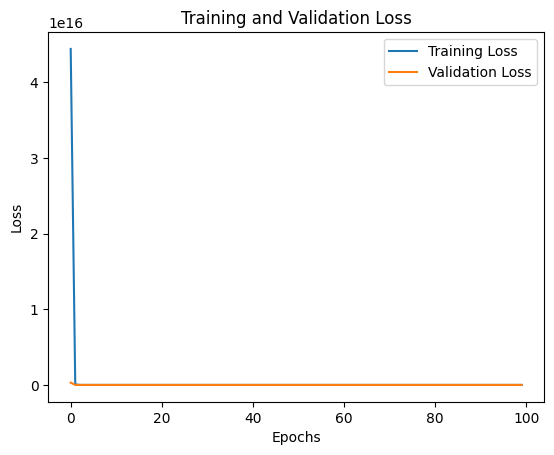

In [83]:
# Plot epochs vs. loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()